In [2]:
# Import Library

import string
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

In [3]:
# Mount ke Google Drive

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Analisa Sentimen/dataset.csv'
data = pd.read_csv(file_path, sep=',', encoding='utf-8')
print(data.head(20))

                                             Komentar Sentimen
0    Ketakutan Resesi Wall Street Lanjutkan Penuru...  Negatif
1    Ketahanan Pangan Desa menjadi Kekuatan Indone...  Positif
2    semoga ekonomi Indonesia tetap tumbuh dan tah...  Positif
3    Caffe type UKM ramping dan kecil justru penye...  Positif
4    Kepala BKKBN Sebut Resesi Seks Bisa Saja Terj...  Negatif
5    Yang bilang Indonesia bebas resesi sadar kali...  Positif
6         Indonesia Kebal Resesi Tren IPO Prospektif   Negatif
7    tanda resesi Indonesia itu kekayaan alamnya b...  Positif
8    Sebentar lagi kita memasuki tahun Jangan samp...  Negatif
9    AMERIKA SERIKAT RESESI TAHUN AWAL BAHAYA UNTU...  Negatif
10   meski dunia mengalami resesi ekonomi insya al...  Negatif
11   Menurut LaNyalla peluang tersebut juga akan m...  Positif
12   Namun Ketua DPD LaNyalla Mahmud Mattalitti me...  Positif
13   Ketua DPD Nilai Resesi Dunia Bisa Jadi Peluan...  Positif
14   lebih pcaya indonesia juara piala dunia pda i...  

In [5]:
# Proses Cleaning

def remove_kata(comment):
  comment = comment.replace('\\t', ' ').replace('\\n', ' ').replace('\\u', ' ').replace('\\', '')
  comment = comment.encode('ascii', 'replace').decode('ascii')
  comment = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/S+)", " ", comment).split())
  return comment.replace("http://", " ").replace("https://", " ")

data['Komentar'] = data['Komentar'].apply(remove_kata)


def remove_angka(comment):
    return re.sub(r"\d+", " ", comment)

data['Komentar'] = data['Komentar'].apply(remove_angka)


def remove_punctuation(comment):
    return comment.translate(str.maketrans("", "", string.punctuation))

data['Komentar'] = data['Komentar'].apply(remove_punctuation)


def remove_whitespace_LT(comment):
    return comment.strip()

data['Komentar'] = data['Komentar'].apply(remove_whitespace_LT)


def remove_whitespace_multiple(comment):
    return re.sub('\s+', ' ', comment)

data['Komentar'] = data['Komentar'].apply(remove_whitespace_multiple)


def remove_single_char(comment):
    return re.sub(r"\b[a-zA-Z]\b", " ", comment)

data['Komentar'] = data['Komentar'].apply(remove_single_char)


print('Hasil Cleaning: \n')
print(data.head(20))

Hasil Cleaning: 

                                             Komentar Sentimen
0    Ketakutan Resesi Wall Street Lanjutkan Penurunan  Negatif
1   Ketahanan Pangan Desa menjadi Kekuatan Indones...  Positif
2   semoga ekonomi Indonesia tetap tumbuh dan taha...  Positif
3   Caffe type UKM ramping dan kecil justru penyel...  Positif
4   Kepala BKKBN Sebut Resesi Seks Bisa Saja Terja...  Negatif
5   Yang bilang Indonesia bebas resesi sadar kali ...  Positif
6          Indonesia Kebal Resesi Tren IPO Prospektif  Negatif
7   tanda resesi Indonesia itu kekayaan alamnya ba...  Positif
8   Sebentar lagi kita memasuki tahun Jangan sampa...  Negatif
9   AMERIKA SERIKAT RESESI TAHUN AWAL BAHAYA UNTUK...  Negatif
10  meski dunia mengalami resesi ekonomi insya all...  Negatif
11  Menurut LaNyalla peluang tersebut juga akan ma...  Positif
12  Namun Ketua DPD LaNyalla Mahmud Mattalitti men...  Positif
13  Ketua DPD Nilai Resesi Dunia Bisa Jadi Peluang...  Positif
14  lebih pcaya indonesia juara piala

In [6]:
# Proses Case Folding

import re
import pandas as pd
def casefolding(comment):
    comment = comment.lower()
    comment = comment.strip()
    return comment
data['Komentar'] = data['Komentar'].apply(casefolding)
print('Hasil Case Folding: \n')
print(data.head(20))

Hasil Case Folding: 

                                             Komentar Sentimen
0    ketakutan resesi wall street lanjutkan penurunan  Negatif
1   ketahanan pangan desa menjadi kekuatan indones...  Positif
2   semoga ekonomi indonesia tetap tumbuh dan taha...  Positif
3   caffe type ukm ramping dan kecil justru penyel...  Positif
4   kepala bkkbn sebut resesi seks bisa saja terja...  Negatif
5   yang bilang indonesia bebas resesi sadar kali ...  Positif
6          indonesia kebal resesi tren ipo prospektif  Negatif
7   tanda resesi indonesia itu kekayaan alamnya ba...  Positif
8   sebentar lagi kita memasuki tahun jangan sampa...  Negatif
9   amerika serikat resesi tahun awal bahaya untuk...  Negatif
10  meski dunia mengalami resesi ekonomi insya all...  Negatif
11  menurut lanyalla peluang tersebut juga akan ma...  Positif
12  namun ketua dpd lanyalla mahmud mattalitti men...  Positif
13  ketua dpd nilai resesi dunia bisa jadi peluang...  Positif
14  lebih pcaya indonesia juara p

In [7]:
data.to_csv("/content/drive/MyDrive/Analisa Sentimen/data_fold.csv", index=False)

data_fold = pd.read_csv("/content/drive/MyDrive/Analisa Sentimen/data_fold.csv")
print(data_fold.shape)
print(data_fold.head())

(1353, 2)
                                            Komentar Sentimen
0   ketakutan resesi wall street lanjutkan penurunan  Negatif
1  ketahanan pangan desa menjadi kekuatan indones...  Positif
2  semoga ekonomi indonesia tetap tumbuh dan taha...  Positif
3  caffe type ukm ramping dan kecil justru penyel...  Positif
4  kepala bkkbn sebut resesi seks bisa saja terja...  Negatif


In [8]:
import string
import re

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [9]:
# Proses Tokenizing

import nltk
nltk.download('punkt')

def word_tokenize_wrapper(comment):
  return word_tokenize(comment)

data['Komentar'] = data['Komentar'].apply(word_tokenize_wrapper)

print('Hasil Tokenizing: \n')
print(data.head(20))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Hasil Tokenizing: 

                                             Komentar Sentimen
0   [ketakutan, resesi, wall, street, lanjutkan, p...  Negatif
1   [ketahanan, pangan, desa, menjadi, kekuatan, i...  Positif
2   [semoga, ekonomi, indonesia, tetap, tumbuh, da...  Positif
3   [caffe, type, ukm, ramping, dan, kecil, justru...  Positif
4   [kepala, bkkbn, sebut, resesi, seks, bisa, saj...  Negatif
5   [yang, bilang, indonesia, bebas, resesi, sadar...  Positif
6   [indonesia, kebal, resesi, tren, ipo, prospektif]  Negatif
7   [tanda, resesi, indonesia, itu, kekayaan, alam...  Positif
8   [sebentar, lagi, kita, memasuki, tahun, jangan...  Negatif
9   [amerika, serikat, resesi, tahun, awal, bahaya...  Negatif
10  [meski, dunia, mengalami, resesi, ekonomi, ins...  Negatif
11  [menurut, lanyalla, peluang, tersebut, juga, a...  Positif
12  [namun, ketua, dpd, lanyalla, mahmud, mattalit...  Positif
13  [ketua, dpd, nilai, resesi, dunia, bisa, jadi,...  Positif
14  [lebih, pcaya, indonesia, juara

In [10]:
data.to_csv("/content/drive/MyDrive/Analisa Sentimen/data_token.csv", index=False)

data_token = pd.read_csv("/content/drive/MyDrive/Analisa Sentimen/data_token.csv")
print(data_token.shape)
print(data_token.head())

(1353, 2)
                                            Komentar Sentimen
0  ['ketakutan', 'resesi', 'wall', 'street', 'lan...  Negatif
1  ['ketahanan', 'pangan', 'desa', 'menjadi', 'ke...  Positif
2  ['semoga', 'ekonomi', 'indonesia', 'tetap', 't...  Positif
3  ['caffe', 'type', 'ukm', 'ramping', 'dan', 'ke...  Positif
4  ['kepala', 'bkkbn', 'sebut', 'resesi', 'seks',...  Negatif


In [11]:
# Proses Filtering/Stopword Removal

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'jgn', 'ga', 'ok', 'bgt', 'banget', 'jg',
                       'resesi', 'ekonomi', 'indonesia'])

list_stopwords = set(list_stopwords)

def stopword_removal(comment):
    return [word for word in comment if word not in list_stopwords]

data['Komentar'] = data['Komentar'].apply(stopword_removal)
print('Hasil Filtering: \n')
print(data.head(20))

Hasil Filtering: 

                                             Komentar Sentimen
0     [ketakutan, wall, street, lanjutkan, penurunan]  Negatif
1   [ketahanan, pangan, desa, kekuatan, menghadapa...  Positif
2   [semoga, tumbuh, tahan, terhada, terpaan, angi...  Positif
3             [caffe, type, ukm, ramping, penyelamat]  Positif
4                               [kepala, bkkbn, seks]  Negatif
5   [bebas, sadar, kali, januari, tanggal, merahny...  Positif
6                      [kebal, tren, ipo, prospektif]  Negatif
7   [tanda, kekayaan, alamnya, kayak, gas, dibutuh...  Positif
8   [sebentar, memasuki, kalabendu, diramalkan, an...  Negatif
9   [amerika, serikat, bahaya, tahan, ekspor, kene...  Negatif
10          [dunia, mengalami, insya, allah, perisai]  Negatif
11  [lanyalla, peluang, menjaga, pertumbuhan, stab...  Positif
12  [ketua, dpd, lanyalla, mahmud, mattalitti, men...  Positif
13  [ketua, dpd, nilai, dunia, peluang, lanyalla, ...  Positif
14             [pcaya, juara, piala,

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
data.to_csv("/content/drive/MyDrive/Analisa Sentimen/data_filter.csv", index=False)

data_filter = pd.read_csv("/content/drive/MyDrive/Analisa Sentimen/data_filter.csv")
print(data_filter.shape)
print(data_filter.head())

(1353, 2)
                                            Komentar Sentimen
0  ['ketakutan', 'wall', 'street', 'lanjutkan', '...  Negatif
1  ['ketahanan', 'pangan', 'desa', 'kekuatan', 'm...  Positif
2  ['semoga', 'tumbuh', 'tahan', 'terhada', 'terp...  Positif
3  ['caffe', 'type', 'ukm', 'ramping', 'penyelamat']  Positif
4                        ['kepala', 'bkkbn', 'seks']  Negatif


In [13]:
!pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 5.6 MB/s eta 0:00:00


In [14]:
# Proses Stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(document):
    return [stemmer.stem(term) for term in document]

data['Komentar'] = data['Komentar'].apply(stemming)
print(data['Komentar'].head())

0                 [takut, wall, street, lanjut, turun]
1     [tahan, pangan, desa, kuat, menghadapai, global]
2    [moga, tumbuh, tahan, terhada, terpa, angin, d...
3                 [caffe, type, ukm, ramping, selamat]
4                                [kepala, bkkbn, seks]
Name: Komentar, dtype: object


In [15]:
data.to_csv("/content/drive/MyDrive/Analisa Sentimen/datafinal.csv", index=False)

datafinal = pd.read_csv("/content/drive/MyDrive/Analisa Sentimen/datafinal.csv")
print(datafinal.shape)
print(datafinal.head())

(1353, 2)
                                            Komentar Sentimen
0     ['takut', 'wall', 'street', 'lanjut', 'turun']  Negatif
1  ['tahan', 'pangan', 'desa', 'kuat', 'menghadap...  Positif
2  ['moga', 'tumbuh', 'tahan', 'terhada', 'terpa'...  Positif
3     ['caffe', 'type', 'ukm', 'ramping', 'selamat']  Positif
4                        ['kepala', 'bkkbn', 'seks']  Negatif


In [16]:
import re
import string

def remove_angka(comment):
    return re.sub(r"\d+", " ", comment)

datafinal['Komentar'] = datafinal['Komentar'].apply(remove_angka)

def remove_punctuation(comment):
    return comment.translate(str.maketrans("", "", string.punctuation))

datafinal['Komentar'] = datafinal['Komentar'].apply(remove_punctuation)

def remove_whitespace_LT(comment):
    return comment.strip()

datafinal['Komentar'] = datafinal['Komentar'].apply(remove_whitespace_LT)

def remove_whitespace_multiple(comment):
    return re.sub('\s+', ' ', comment)

datafinal['Komentar'] = datafinal['Komentar'].apply(remove_whitespace_multiple)

def remove_single_char(comment):
    return re.sub(r"\b[a-zA-Z]\b", " ", comment)

datafinal['Komentar'] = datafinal['Komentar'].apply(remove_single_char)

def remove_extra_chars(comment):
    comment = comment.replace('[', '').replace(']', '').replace(',', '').replace("'", '')
    return comment

datafinal['Komentar'] = datafinal['Komentar'].apply(remove_extra_chars)

In [17]:
# Most Frequent Words

import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(comment, columncomment, quantity):
  all_words = ' '.join([comment for comment in comment[columncomment].astype('str')])
  token_phrase = token_space.tokenize(all_words)
  frequency = nltk.FreqDist(token_phrase)
  df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                               "Frequency": list(frequency.values())})
  df_frequency = df_frequency.nlargest(quantity, columns="Frequency")
  plt.figure(figsize=(12, 8))
  ax = sns.barplot(data=df_frequency, x="Word", y="Frequency", palette='deep')
  ax.set(ylabel="Count")
  plt.xticks(rotation='vertical')
  plt.show()

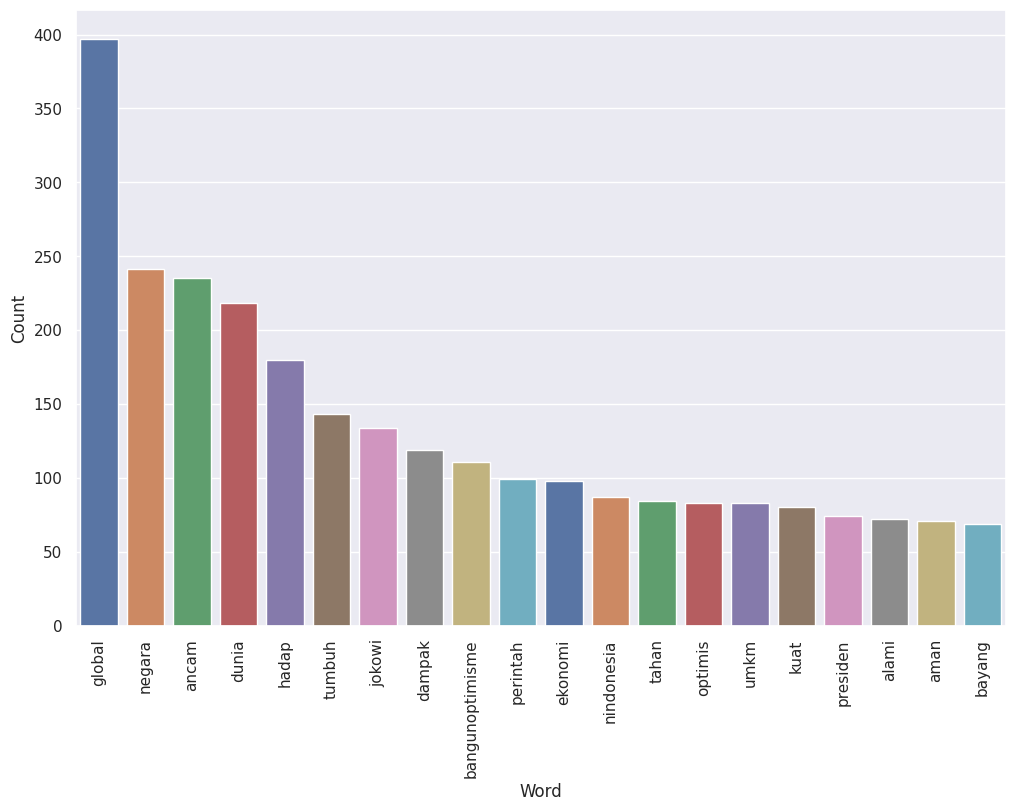

In [18]:
counter(datafinal, "Komentar", 20)

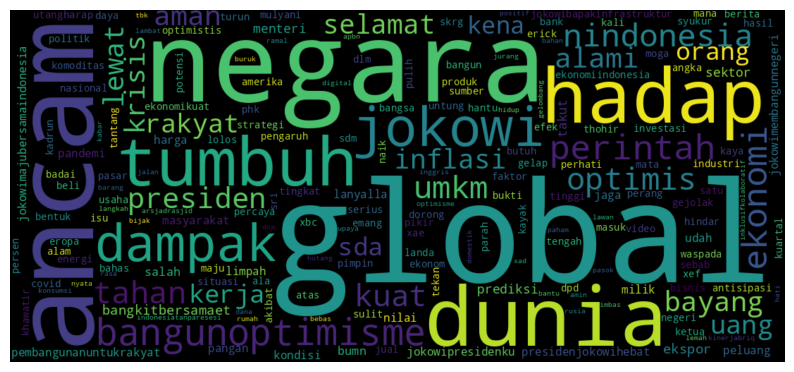

In [19]:
# Word Cloud

from wordcloud import WordCloud

datafinal = datafinal["Komentar"]
all_words = ' '.join([comment for comment in datafinal])
wordcloud = WordCloud(width= 1100, height= 500,
                      max_font_size= 200,
                      collocations= False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

In [20]:
import pandas as pd

datafinal = pd.read_csv("/content/drive/MyDrive/Analisa Sentimen/datafinal.csv")
datafinal = datafinal.astype({'Sentimen': 'category', 'Komentar': 'string'})
print(datafinal.dtypes)

Komentar      string
Sentimen    category
dtype: object


In [21]:
# Proses TF-IDF

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

datafinal = pd.read_csv("/content/drive/MyDrive/Analisa Sentimen/datafinal.csv")
datafinal = datafinal.astype({'Sentimen': 'category', 'Komentar': 'string'})

tf = TfidfVectorizer()

text_tf = tf.fit_transform(datafinal['Komentar'].astype('U'))

result = pd.DataFrame(text_tf.toarray(), columns=tf.get_feature_names_out()).join(datafinal['Sentimen'])

print(result)

      aamiin  abai  abang  abdi  abis  acara  action  acu  ada  adadikompas  \
0        0.0   0.0    0.0   0.0   0.0    0.0     0.0  0.0  0.0          0.0   
1        0.0   0.0    0.0   0.0   0.0    0.0     0.0  0.0  0.0          0.0   
2        0.0   0.0    0.0   0.0   0.0    0.0     0.0  0.0  0.0          0.0   
3        0.0   0.0    0.0   0.0   0.0    0.0     0.0  0.0  0.0          0.0   
4        0.0   0.0    0.0   0.0   0.0    0.0     0.0  0.0  0.0          0.0   
...      ...   ...    ...   ...   ...    ...     ...  ...  ...          ...   
1348     0.0   0.0    0.0   0.0   0.0    0.0     0.0  0.0  0.0          0.0   
1349     0.0   0.0    0.0   0.0   0.0    0.0     0.0  0.0  0.0          0.0   
1350     0.0   0.0    0.0   0.0   0.0    0.0     0.0  0.0  0.0          0.0   
1351     0.0   0.0    0.0   0.0   0.0    0.0     0.0  0.0  0.0          0.0   
1352     0.0   0.0    0.0   0.0   0.0    0.0     0.0  0.0  0.0          0.0   

      ...  yups  zaman  zero  zinah  ziyech  zona  

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import drive

drive.mount('/content/drive')

datafinal = pd.read_csv("/content/drive/MyDrive/Analisa Sentimen/datafinal.csv")
datafinal = datafinal.astype({'Sentimen': 'category', 'Komentar': 'string'})

tf = TfidfVectorizer()
text_tf = tf.fit_transform(datafinal['Komentar'].astype('U'))

result = pd.DataFrame(text_tf.toarray(), columns=tf.get_feature_names_out()).join(datafinal['Sentimen'])
result.to_excel('/content/drive/MyDrive/Analisa Sentimen/hasil.xlsx', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


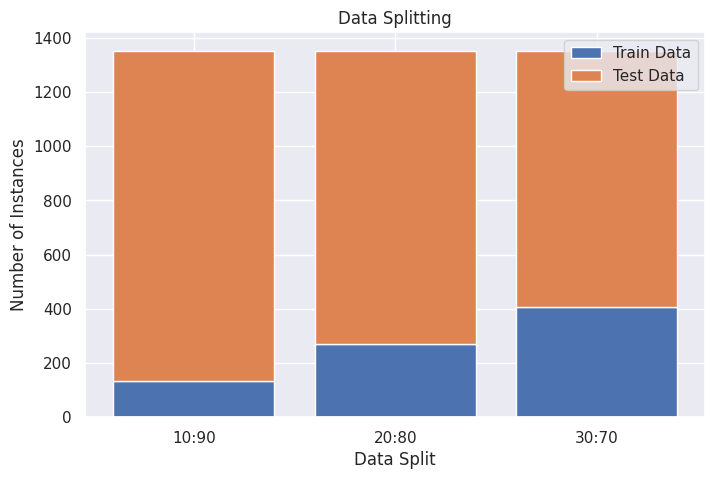

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Data splitting 10:90
split_ratio_10 = 0.1
split_index_10 = int(split_ratio_10 * len(datafinal))
train_data_10 = datafinal.iloc[:split_index_10]
test_data_10 = datafinal.iloc[split_index_10:]

# Data splitting 20:80
split_ratio_20 = 0.2
split_index_20 = int(split_ratio_20 * len(datafinal))
train_data_20 = datafinal.iloc[:split_index_20]
test_data_20 = datafinal.iloc[split_index_20:]

# Data splitting 30:70
split_ratio_30 = 0.3
split_index_30 = int(split_ratio_30 * len(datafinal))
train_data_30 = datafinal.iloc[:split_index_30]
test_data_30 = datafinal.iloc[split_index_30:]

data_splits = ['10:90', '20:80', '30:70']
train_sizes = [len(train_data_10), len(train_data_20), len(train_data_30)]
test_sizes = [len(test_data_10), len(test_data_20), len(test_data_30)]

plt.figure(figsize=(8, 5))
plt.bar(data_splits, train_sizes, label='Train Data')
plt.bar(data_splits, test_sizes, bottom=train_sizes, label='Test Data')
plt.xlabel('Data Split')
plt.ylabel('Number of Instances')
plt.title('Data Splitting')
plt.legend()
plt.show()

Akurasi (90:10): 0.7426470588235294
Presisi (90:10): 0.7426995457495134
Recall (90:10): 0.7426470588235294
F1-Score (90:10): 0.7426331440929981
Confusion Matrix (90:10):
[[51 17]
 [18 50]]
Hasil Positif (90:10): 67
Hasil Negatif (90:10): 69


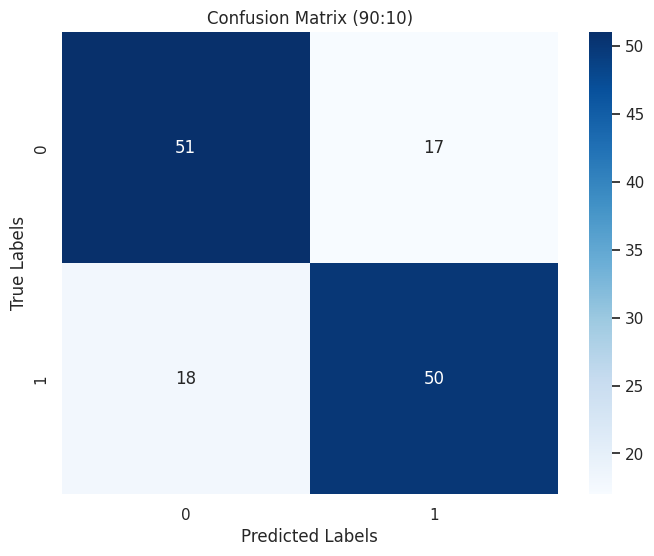

Akurasi (80:20): 0.7158671586715867
Presisi (80:20): 0.7133714893091844
Recall (80:20): 0.7158671586715867
F1-Score (80:20): 0.7145561541716279
Confusion Matrix (80:20):
[[97  0 37]
 [ 1  0  0]
 [39  0 97]]
Hasil Positif (80:20): 0
Hasil Negatif (80:20): 98


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


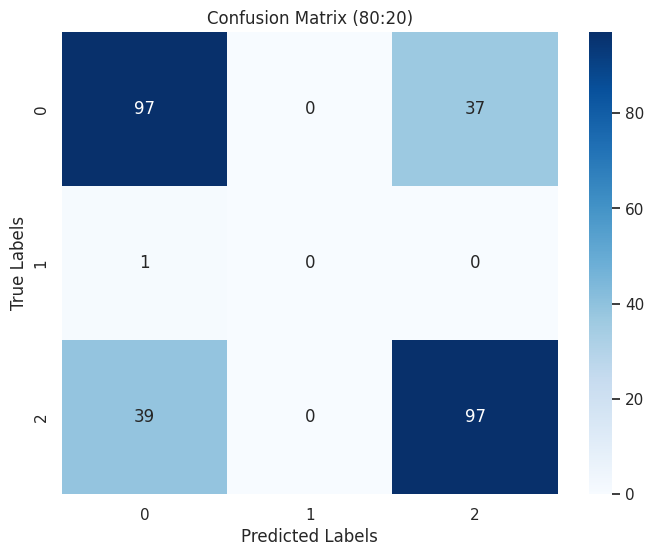

Akurasi (70:30): 0.7241379310344828
Presisi (70:30): 0.7215130458769531
Recall (70:30): 0.7241379310344828
F1-Score (70:30): 0.722190123128824
Confusion Matrix (70:30):
[[151   0  49]
 [  1   0   1]
 [ 61   0 143]]
Hasil Positif (70:30): 0
Hasil Negatif (70:30): 152


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


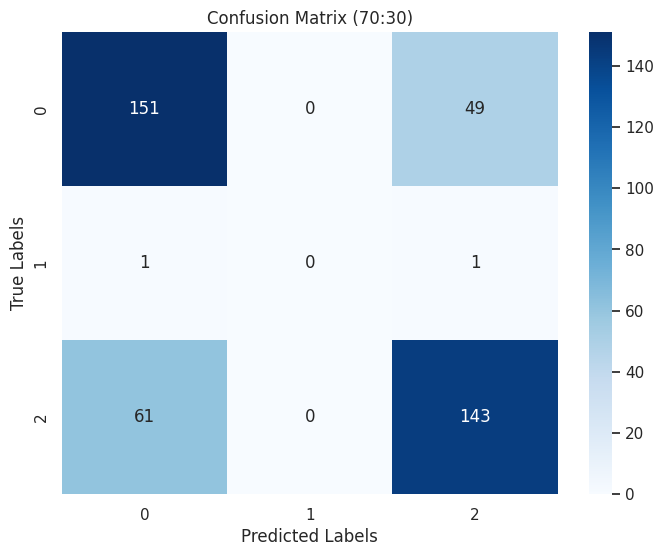

In [24]:
# Performa Algoritma Naive Bayes (Akurasi)

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data dari file CSV
datafinal = pd.read_csv("/content/drive/MyDrive/Analisa Sentimen/datafinal.csv")
datafinal = datafinal.astype({'Sentimen': 'category', 'Komentar': 'string'})

# Memisahkan fitur dan label
X = datafinal['Komentar']
y = datafinal['Sentimen']

# Pengujian dengan pembagian data 90:10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Mengubah teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Melatih model Naive Bayes
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test_vec)

# Menghitung skor akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi (90:10):", accuracy)

# Menghitung skor presisi
precision = precision_score(y_test, y_pred, average='weighted')
print("Presisi (90:10):", precision)

# Menghitung skor recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall (90:10):", recall)

# Menghitung skor f1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-Score (90:10):", f1)

# Menghitung confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (90:10):")
print(confusion_mat)

# Menghitung hasil positif dan negatif
positive = confusion_mat[1, 1] + confusion_mat[0, 1]
negative = confusion_mat[1, 0] + confusion_mat[0, 0]
print("Hasil Positif (90:10):", positive)
print("Hasil Negatif (90:10):", negative)

# Menampilkan grafik confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (90:10)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Pengujian dengan pembagian data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengubah teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Melatih model Naive Bayes
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test_vec)

# Menghitung skor akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi (80:20):", accuracy)

# Menghitung skor presisi
precision = precision_score(y_test, y_pred, average='weighted')
print("Presisi (80:20):", precision)

# Menghitung skor recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall (80:20):", recall)

# Menghitung skor f1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-Score (80:20):", f1)

# Menghitung confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (80:20):")
print(confusion_mat)

# Menghitung hasil positif dan negatif
positive = confusion_mat[1, 1] + confusion_mat[0, 1]
negative = confusion_mat[1, 0] + confusion_mat[0, 0]
print("Hasil Positif (80:20):", positive)
print("Hasil Negatif (80:20):", negative)

# Menampilkan grafik confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (80:20)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Pengujian dengan pembagian data 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mengubah teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Melatih model Naive Bayes
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test_vec)

# Menghitung skor akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi (70:30):", accuracy)

# Menghitung skor presisi
precision = precision_score(y_test, y_pred, average='weighted')
print("Presisi (70:30):", precision)

# Menghitung skor recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall (70:30):", recall)

# Menghitung skor f1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-Score (70:30):", f1)

# Menghitung confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (70:30):")
print(confusion_mat)

# Menghitung hasil positif dan negatif
positive = confusion_mat[1, 1] + confusion_mat[0, 1]
negative = confusion_mat[1, 0] + confusion_mat[0, 0]
print("Hasil Positif (70:30):", positive)
print("Hasil Negatif (70:30):", negative)

# Menampilkan grafik confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (70:30)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()